<a href="https://colab.research.google.com/github/Hemingweb006/Deep-Learning/blob/main/Brain_Tumor_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import tensorflow as tf
import opendatasets as od
from tensorflow import keras
from keras import layers, Sequential
from keras.preprocessing import image_dataset_from_directory
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt



*  Downloading Data



In [3]:
od.download("https://www.kaggle.com/datasets/hamzahabib47/brain-cancer-detection-mri-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemingweb
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/hamzahabib47/brain-cancer-detection-mri-images


100%|██████████| 13.9M/13.9M [00:00<00:00, 55.7MB/s]


In [4]:
BATCH = 16
SIZE = (128,128)

train_dir = "/content/brain-cancer-detection-mri-images/Dataset"

train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split = 0.2,
    subset = "training",
    shuffle=True,
    seed = 123,
    batch_size=BATCH,
    image_size=SIZE
    )

val_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    validation_split = 0.2,
    subset = "validation",
    shuffle=True,
    seed = 123,
    batch_size=BATCH,
    image_size=SIZE
    )

Found 800 files belonging to 2 classes.
Using 640 files for training.
Found 800 files belonging to 2 classes.
Using 160 files for validation.


['healthy', 'tumor']


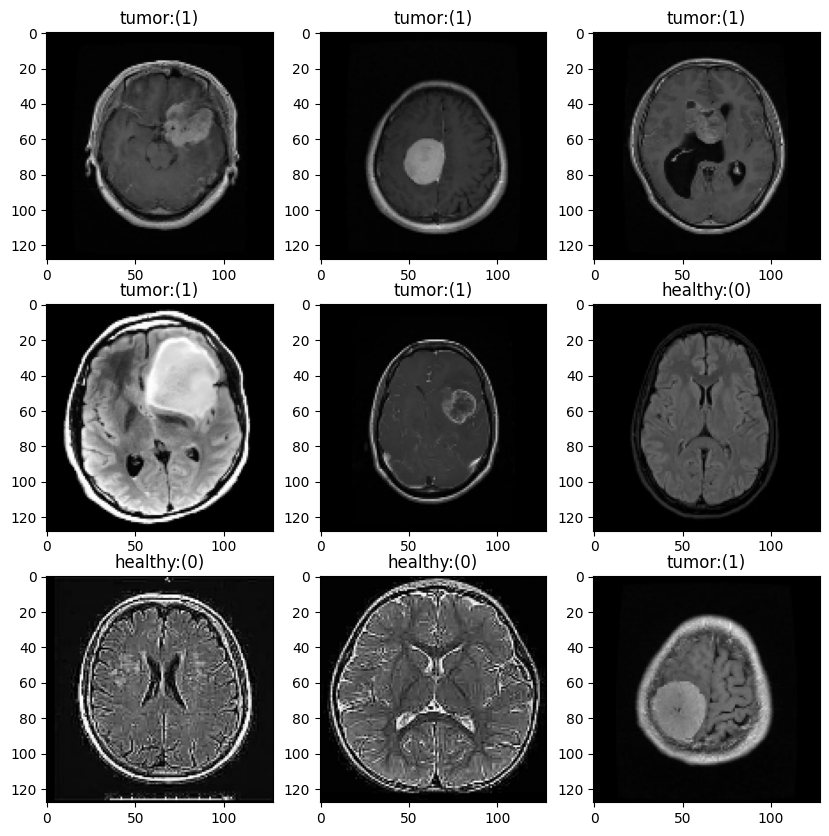

In [5]:
#Data Visualization

class_names = train_dataset.class_names
print(class_names)

for images, labels in train_dataset.take(1):
  plt.figure(figsize=(10,10))
  for i in range(9):
    plt.subplot(3,3,i+1)
    label_index = labels[i].numpy().argmax()
    plt.title(f"{class_names[label_index]}:({label_index})")
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("on")

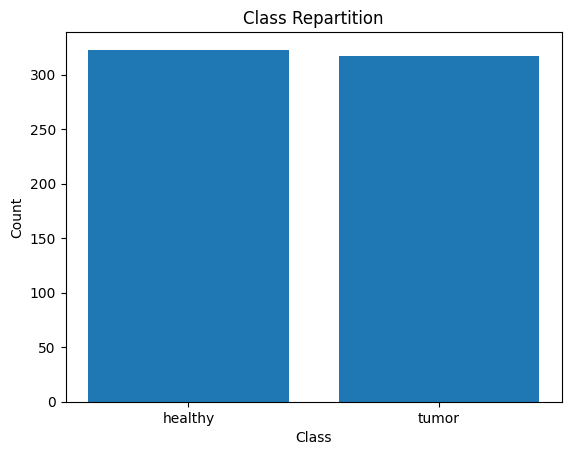

In [6]:
#Data Repartition:

class_count = np.zeros(len(class_names), dtype= int)

for images, labels in train_dataset:
  for label in labels:
    label_index = label.numpy().argmax()
    class_count[label_index] += 1

plt.bar(class_names, class_count)
plt.title("Class Repartition")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [7]:
#making the model

def preprocessing_input(dataset):
  return dataset.map(lambda x, y: (preprocess_input(x), y))

train_dataset = preprocessing_input(train_dataset)
val_dataset = preprocessing_input(val_dataset)

pre_model = InceptionV3(input_shape=(128,128,3), weights="imagenet", include_top=False)

pre_model.trainable = False

x = pre_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation="softmax")(x)

model = keras.Model(inputs=pre_model.input, outputs=outputs)

model.compile(
    optimizer="adam",
    loss = keras.losses.CategoricalCrossentropy(from_logits = False),
    metrics=["accuracy"]
)

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,426,786 (93.18 MB)

 Trainable params: 2,624,002 (10.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [8]:
#model_training

history = model.fit(train_dataset, validation_data = val_dataset, epochs = 35)

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 39s 733ms/step - accuracy: 0.5934 - loss: 3.2474 - val_accuracy: 0.6187 - val_loss: 2.9930
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 38s 644ms/step - accuracy: 0.7940 - loss: 1.5698 - val_accuracy: 0.8750 - val_loss: 0.4375
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - accuracy: 0.8700 - loss: 0.6114 - val_accuracy: 0.8938 - val_loss: 0.3211
Epoch 4/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 42s 669ms/step - accuracy: 0.9006 - loss: 0.3408 - val_accuracy: 0.8875 - val_loss: 0.3818
Epoch 5/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 654ms/step - accuracy: 0.8784 - loss: 0.3512 - val_accuracy: 0.8875 - val_loss: 0.4424
Epoch 6/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 25s 629ms/step - accuracy: 0.9234 - loss: 0.2259 - val_accuracy: 0.9250 - val_loss: 0.2316
Epoch 7/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 742ms/step - accuracy: 0.9246 - loss: 0.2281 - val_accuracy: 0.8750 - val_loss: 0.3633
Epoch 8/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 741ms/step - accuracy: 0.9155 - loss: 0.2280 - val_accu

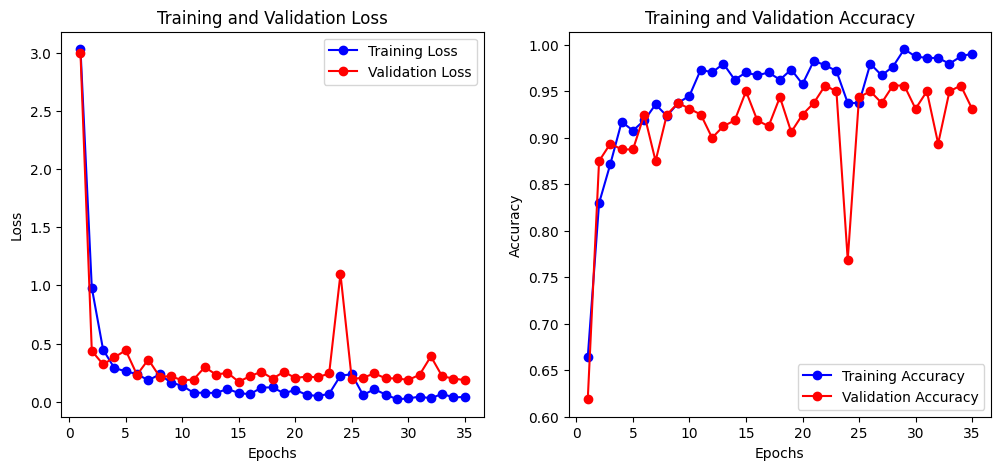

In [9]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
model.save("Brain_Cancer.h5")
print("Model Saved!")

Model Saved!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.03892873 0.9610713 ]]


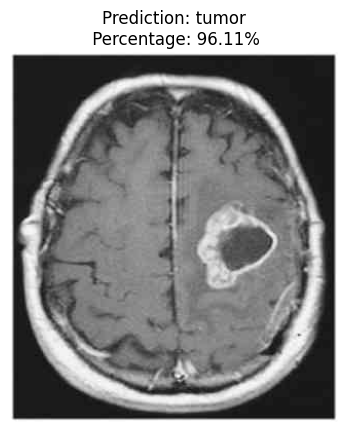

In [26]:
from keras.preprocessing import image

model = keras.models.load_model("Brain_Cancer.h5")

def preprocess_test(image_path, size):
  img = image.load_img(image_path, target_size=size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array/255.0

  return img_array

test_img = preprocess_test("/content/test.jpg", (128,128))
prediction = model.predict(test_img)

print(prediction)

plt.imshow(image.load_img("/content/test.jpg"))
plt.title(f"Prediction: {class_names[prediction.argmax()]}\n Percentage: {prediction.max()*100:.2f}%")
plt.axis("off")
plt.show()